<a href="https://colab.research.google.com/github/palaciosalondra584-dev/Inteligencia_Artificial/blob/main/Multicapa/Predicci%C3%B3n_de_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Instalamos la libreria ucimlrepo

In [3]:
!pip install ucimlrepo


#### Descargamos el dataset y obtenemos las caracteristicas "x" y las etiquetas o variables "y" , en resumen preparamos los detso para anlizarlos en necesidad de descargarlos manualmente

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


####Mostramos las  primeras filas del dataframe para una vista rapida

In [5]:
X.head()


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


####Muestra las primeras cinco filas de la variable objetivo, esto nos ayuda de ver rapidamente los valores que intenta predecir el modelo

In [6]:
y.head()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


####Mostramos el resumen general del dataframe, esto para ver rapidamente la estructura de los datos y detectar las columnas con valores faltantes o incorrectos

In [7]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


####Muestra el resumen general del dataframe: Número de filas,tipo de dato de la columna,cantidad de valores no nulos  y el uso de memoria aproximado

In [8]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [9]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


####Combinamos las variables y el objetivo eliminando los valores nulos asegurandonos que el dataframe no tenga datos faltantes

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


####Separamos nuevamente las caracteristicas y el objetivo, ahora "x" contiene los datos de entrada y los valores que el modelo intentara predecir

In [11]:
X = df.drop('mpg', axis=1)
y = df['mpg']


####Divimos el dataset en entrenamirnto y pturba asegurandonos que la division sea equilibrada, supervisando la regresion

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


####Mostramos lass filas y columnas del entrenamiento de prueba, ayudandonos a ver si la division esta bien y esta equilibrada

In [13]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


####Normalizamos las caracteristicas asegurandonos que la media sea 0 y la division estandar 1, ayudando a que el modelo aprenda mas rapido y de manera mas estable

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


####Definimos las capas del modelo: la primera capa con 64 neuronas, la segunda 32, la tercera 16,todas con la funcion ReLU y la capa de salida con 1 neurona para predecir un valor continuo

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####Creamos un optimizador con Adam y lo compilan en el modelo, en conclusion el modelo aprende de los errores durante el entrenamiento

In [16]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


####Configuramos el modelo para resolver un problema de regresion con evaluacion de errores en escala de unidades originales

In [17]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)


####Entrenamos la neurona con 5 epocas actualizando los pesos despues de cada muestra individual

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 372.2592 - root_mean_squared_error: 18.7857 - val_loss: 24.3077 - val_root_mean_squared_error: 4.9303
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.3446 - root_mean_squared_error: 4.0256 - val_loss: 13.9292 - val_root_mean_squared_error: 3.7322
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.5337 - root_mean_squared_error: 3.5304 - val_loss: 10.8737 - val_root_mean_squared_error: 3.2975
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2721 - root_mean_squared_error: 2.6735 - val_loss: 11.5781 - val_root_mean_squared_error: 3.4027
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2900 - root_mean_squared_error: 2.6945 - val_loss: 11.3607 - val_root_mean_squared_error: 3.3706


####Graficamos la evolucion de la perdida durante el entrenamiento agregando etiquetas y el titulo para su mejor entendimiento

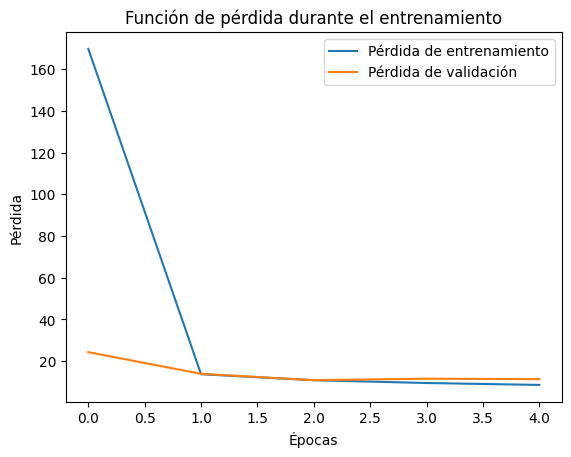

In [19]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


####Evaluamos el desmempeño del modelo en el conjunto prueba,indicando que tan preciso son las predicciones del modelo con los datos que nunca vio

In [20]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.0719 - root_mean_squared_error: 3.3252
Test Mean Absolute Error: 3.37


####Comparamos las predicciones del modelo con los valores reales, permitiendonos visualizar que tan cerca estan las predicciones de los valores reales

In [21]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
     Actual  Predicted
82     23.0  22.451199
167    29.0  28.311077
356    32.4  34.996006
120    19.0  17.859837
385    38.0  39.178684


####Evaluamos el desempeño del modelo usando metricas de regresion, R2:donde valores cercanos al 1 indica que es bueno y 0 que no
####MSE que mide el error cuadratico, donde valores mas bajos muestran un mejor ajuste del modelo

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8361177713569544
MSE: 11.360688966902801
